# Crimes in India- Phase 2

In [115]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

import warnings
warnings.filterwarnings("ignore")

In [116]:
#loading the data
cii=pd.read_excel(r'C:\Users\Dell\Documents\Crime in India.xlsx')
cii

,State / UT,Area,Population,Literacy Rate,Total Crime per capita,Crime rates 2019,Crime rates 2020,Crime rates 2021,Violent Crimes,Murder,Rape,Kidnapping,Crimes Against Children,Extortion,Robbery,Hit and Run,Drugs Trafficking,Illegal Arms
0,Andhra Pradesh,162975,49577103,66.40,0.004482,278.6,452.7,420.4,13.7,1.8,4.5,1.6,17.7,0.6,0.5,1.4,2.1,0.1
1,Arunachal Pradesh,83743,1383727,66.95,0.002196,190.9,164.5,197.7,32.0,3.2,11.1,5.5,27.5,5.3,3.3,2.6,2.9,0.1
2,Assam,78438,31205576,85.90,0.004270,385.5,349.5,379.0,76.6,3.4,10.0,21.6,43.7,3.9,5.4,4.2,2.9,0.5
3,Bihar,94163,104099452,70.90,0.002710,224.0,211.3,228.0,35.4,2.3,1.3,8.2,14.5,0.5,2.0,0.8,0.2,2.5
4,Chhattisgarh,135192,25545198,77.30,0.004331,334.7,352.9,373.7,28.6,3.4,7.4,9.1,61.6,0.3,1.9,6.0,3.7,0.4
5,Goa,3702,1458545,87.40,0.002051,241.5,281.1,191.6,22.1,1.7,9.3,3.3,39.5,0.2,1.7,1.5,4.1,0.3
6,Gujarat,196024,60439692,82.40,0.012107,631.6,1011.4,1044.2,11.9,1.4,1.8,2.3,21.6,0.4,0.8,1.6,0.4,0.8
7,Haryana,44212,25351462,80.40,0.008143,577.4,658.6,697.3,43.3,3.8,12.3,12.0,62.5,1.2,2.3,2.1,3.9,7.7
8,Himachal Pradesh,55673,6864602,86.60,0.002743,272.4,280.2,254.3,23.8,1.2,9.8,5.8,34.4,0.1,0.1,0.9,14.7,0.1
9,Jharkhand,79716,32988134,74.30,0.001842,165.5,166.8,157.3,34.9,4.1,7.6,4.6,13.5,1.3,1.8,4.0,0.7,1.2


2.1: Analysis of Literacy Rate vs Total Crimes

In [118]:
columns_to_drop = ['Area', 'Population', 'Crime rates 2019', 'Crime rates 2020', 'Crime rates 2021', 'Violent Crimes', 'Murder', 'Rape', 'Kidnapping', 'Crimes Against Children', 'Extortion', 'Robbery', 'Hit and Run', 'Drugs Trafficking', 'Illegal Arms', 'Total Crimes']
cii_1 = cii.loc[:, ~cii.columns.isin(columns_to_drop)]
cii_1

,State / UT,Literacy Rate,Total Crime per capita
0,Andhra Pradesh,66.40,0.004482
1,Arunachal Pradesh,66.95,0.002196
2,Assam,85.90,0.004270
3,Bihar,70.90,0.002710
4,Chhattisgarh,77.30,0.004331
5,Goa,87.40,0.002051
6,Gujarat,82.40,0.012107
7,Haryana,80.40,0.008143
8,Himachal Pradesh,86.60,0.002743
9,Jharkhand,74.30,0.001842


In [119]:
cii_1.head()

,State / UT,Literacy Rate,Total Crime per capita
0,Andhra Pradesh,66.40,0.004482
1,Arunachal Pradesh,66.95,0.002196
2,Assam,85.90,0.004270
3,Bihar,70.90,0.002710
4,Chhattisgarh,77.30,0.004331


2.1: Analysis of literacy rate vs total crime

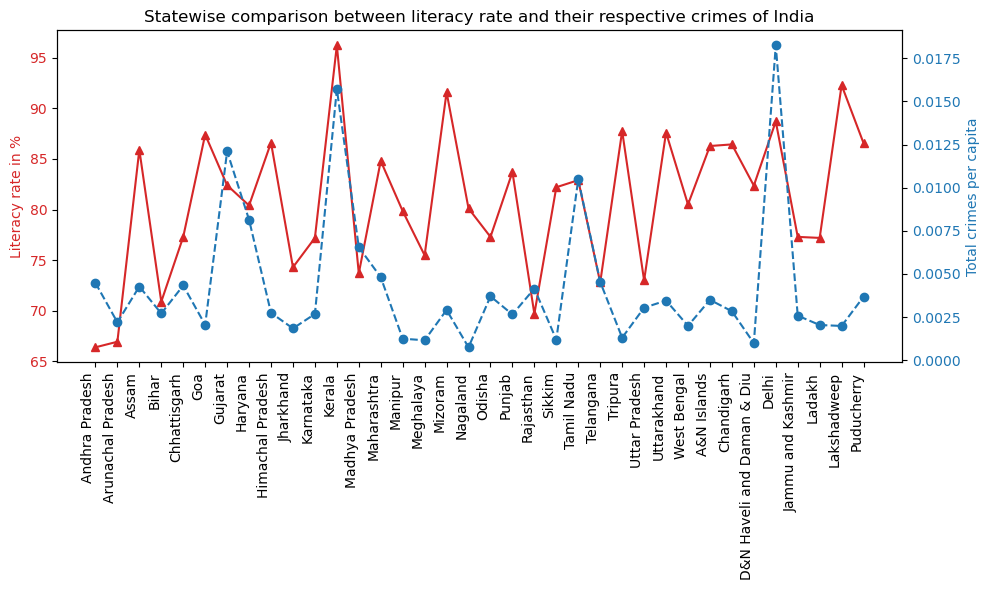

In [148]:
plt.figure(figsize=(10, 6))
color = 'tab:red'
x= list(cii_1['State / UT'])
plt.plot(x, cii_1['Literacy Rate'], color=color, marker='^')
plt.gca().tick_params(axis='y', labelcolor=color)
plt.gca().set_ylabel('Literacy rate in %', color=color)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(x, ha='right')
ax2 = plt.gca().twinx()
color = 'tab:blue'
plt.plot(x, cii_1[' Total Crime per capita'], color=color, marker='o', ls='--')
plt.gca().set_ylabel('Total crimes per capita', color=color)
plt.gca().tick_params(axis='y', labelcolor=color)
plt.gca().set_title('Statewise comparison between literacy rate and their respective crimes of India')
plt.tight_layout()
plt.show()


2.2: Analysis of the type of crime vs each state vs literacy rate

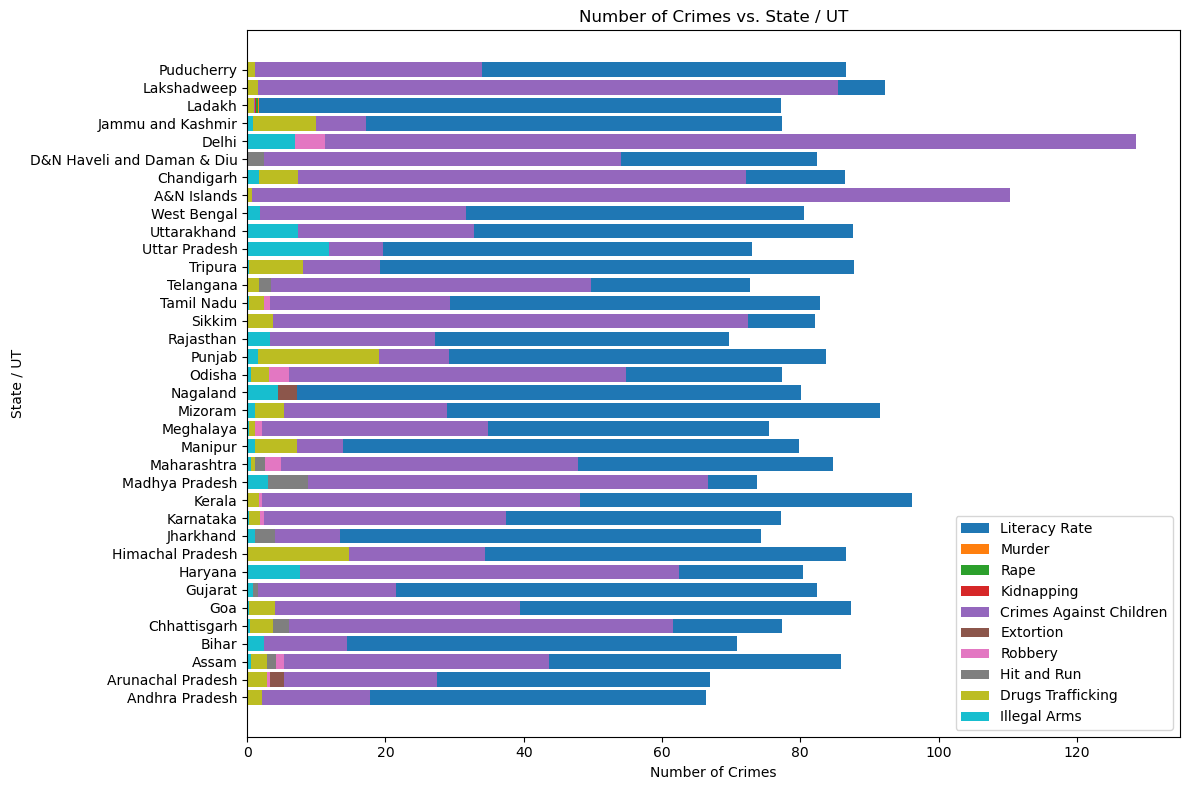

In [191]:
crime_df = cii[['State / UT', 'Literacy Rate', 'Murder', 'Rape', 'Kidnapping', 'Crimes Against Children', 'Extortion', 'Robbery', 'Hit and Run', 'Drugs Trafficking', 'Illegal Arms']]

crime_df.set_index('State / UT', inplace=True)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each type of crime

# Plot each type of crime for each state
for i, crime_type in enumerate(crime_df.columns):
    ax.barh(crime_df.index, crime_df[crime_type], label=crime_type)

ax.set_xlabel('Number of Crimes')
ax.set_ylabel('State / UT')
ax.set_title('Number of Crimes vs. State / UT')
plt.legend()
plt.tight_layout()
plt.show()

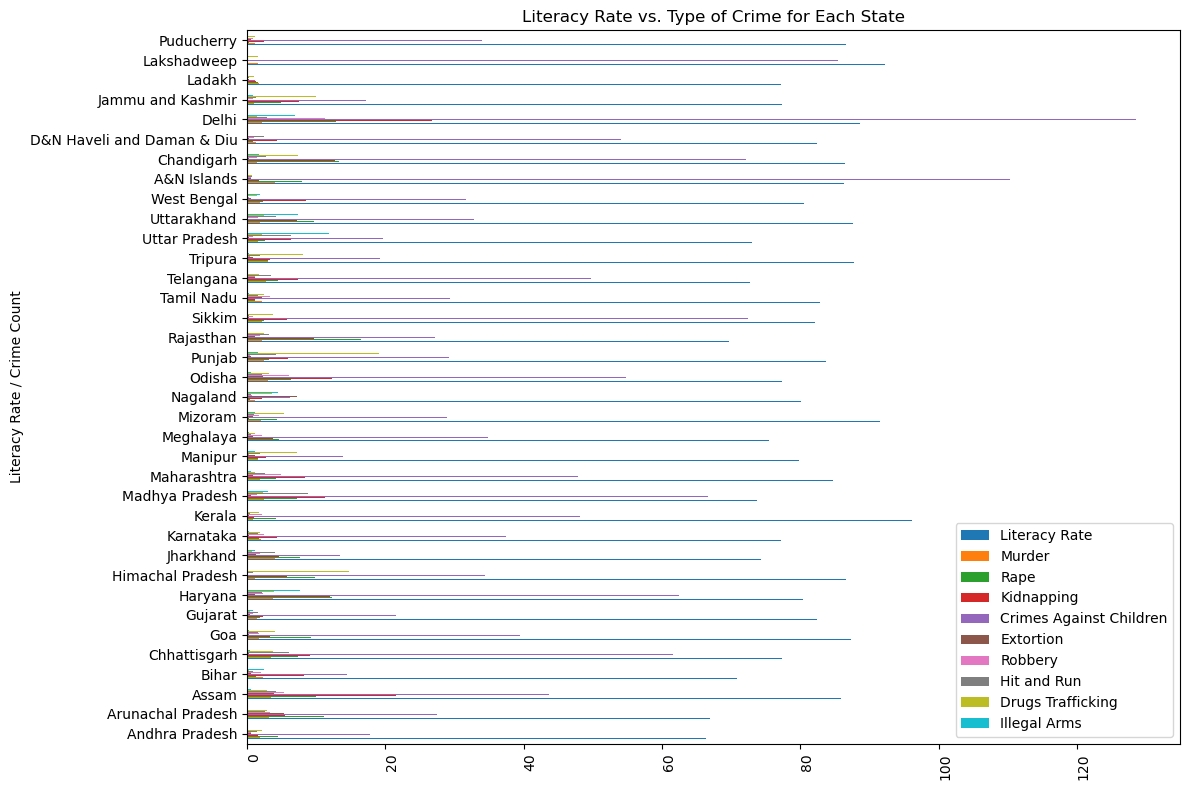

In [175]:
crime_literacy_data = cii[['State / UT', 'Literacy Rate', 'Murder', 'Rape', 'Kidnapping', 'Crimes Against Children', 'Extortion', 'Robbery', 'Hit and Run', 'Drugs Trafficking', 'Illegal Arms']]

fig, ax = plt.subplots(figsize=(12, 8)) 
crime_literacy_data.plot(kind='barh', x='State / UT', ax=ax)
ax.set_ylabel('Literacy Rate / Crime Count')
ax.set_title('Literacy Rate vs. Type of Crime for Each State')
plt.xticks(rotation=90, ha='left')
plt.tight_layout()
plt.show()

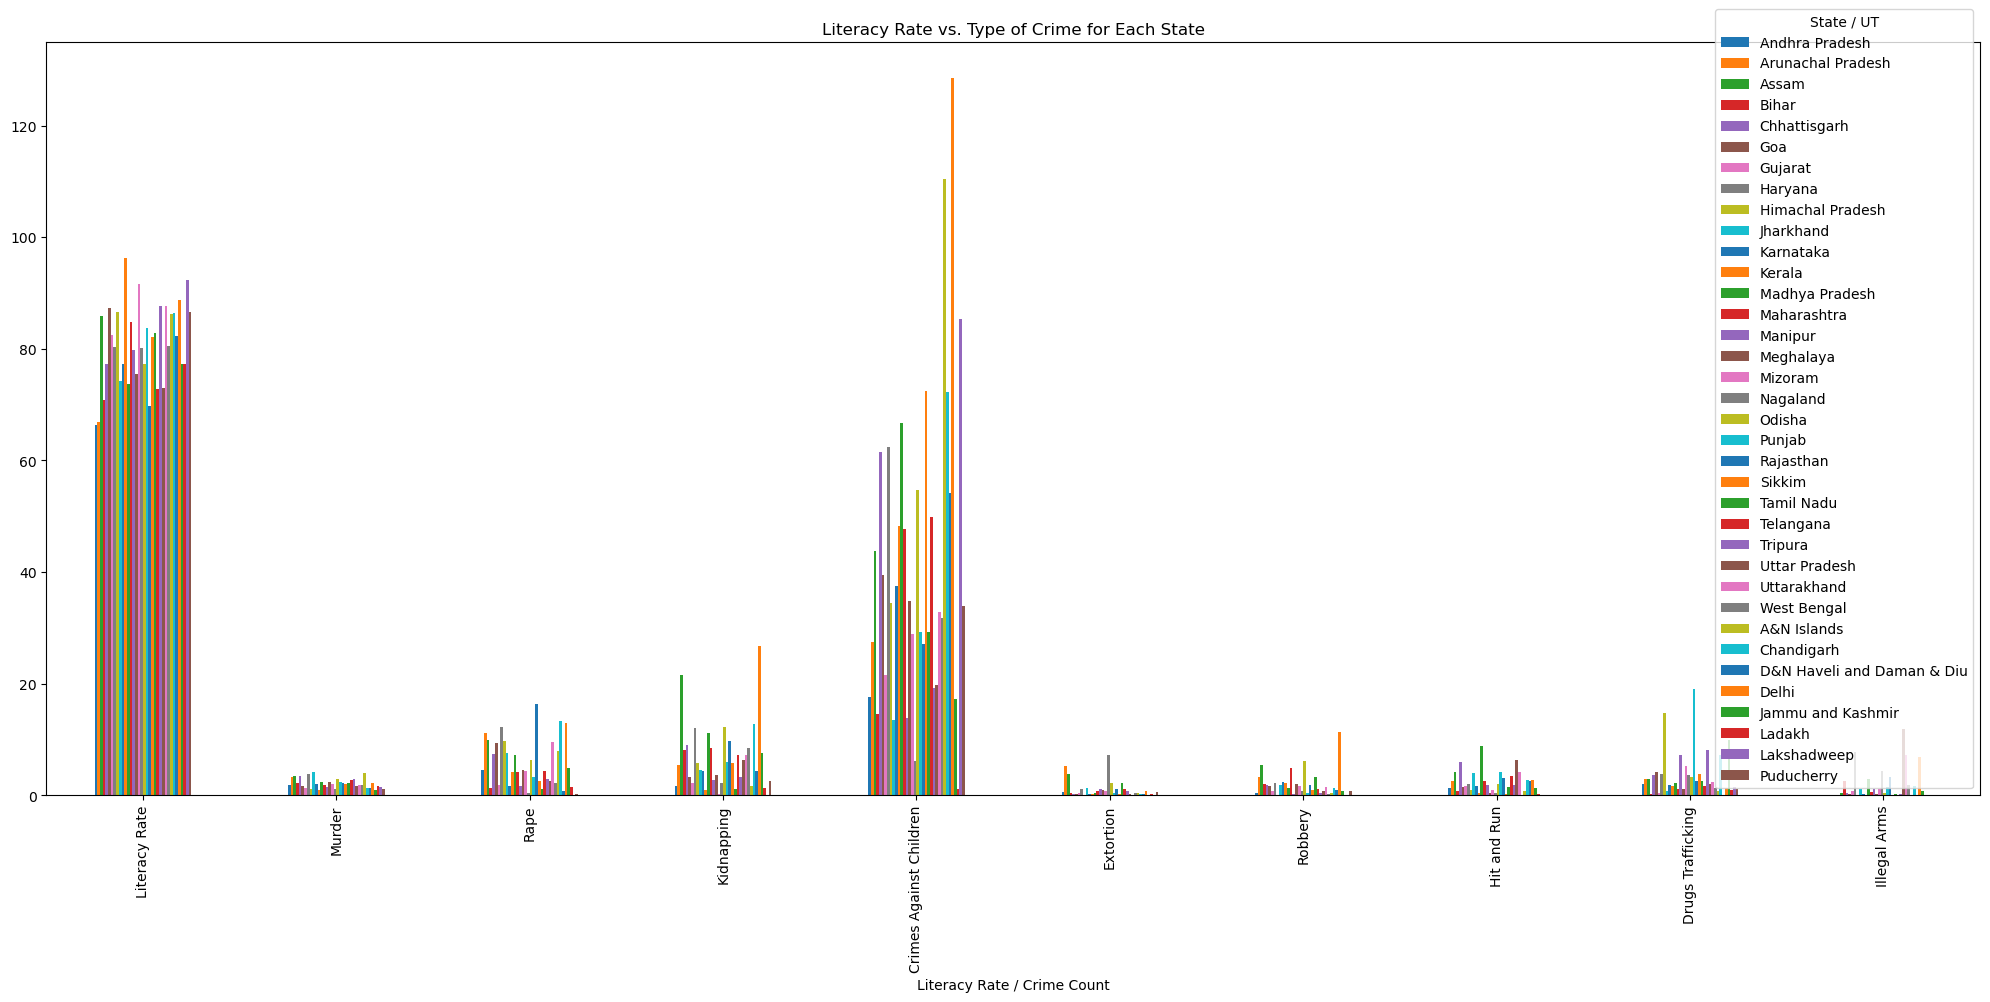

In [183]:
crime_literacy_data = cii[['State / UT', 'Literacy Rate', 'Murder', 'Rape', 'Kidnapping', 'Crimes Against Children', 'Extortion', 'Robbery', 'Hit and Run', 'Drugs Trafficking', 'Illegal Arms']]

# Transpose the DataFrame to have states as rows and features as columns
crime_literacy_data.set_index('State / UT', inplace=True)
crime_literacy_data = crime_literacy_data.T

fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the figure size as needed
crime_literacy_data.plot(kind='bar', ax=ax)
ax.set_xlabel('Literacy Rate / Crime Count')
ax.set_title('Literacy Rate vs. Type of Crime for Each State')
plt.tight_layout()
plt.show()

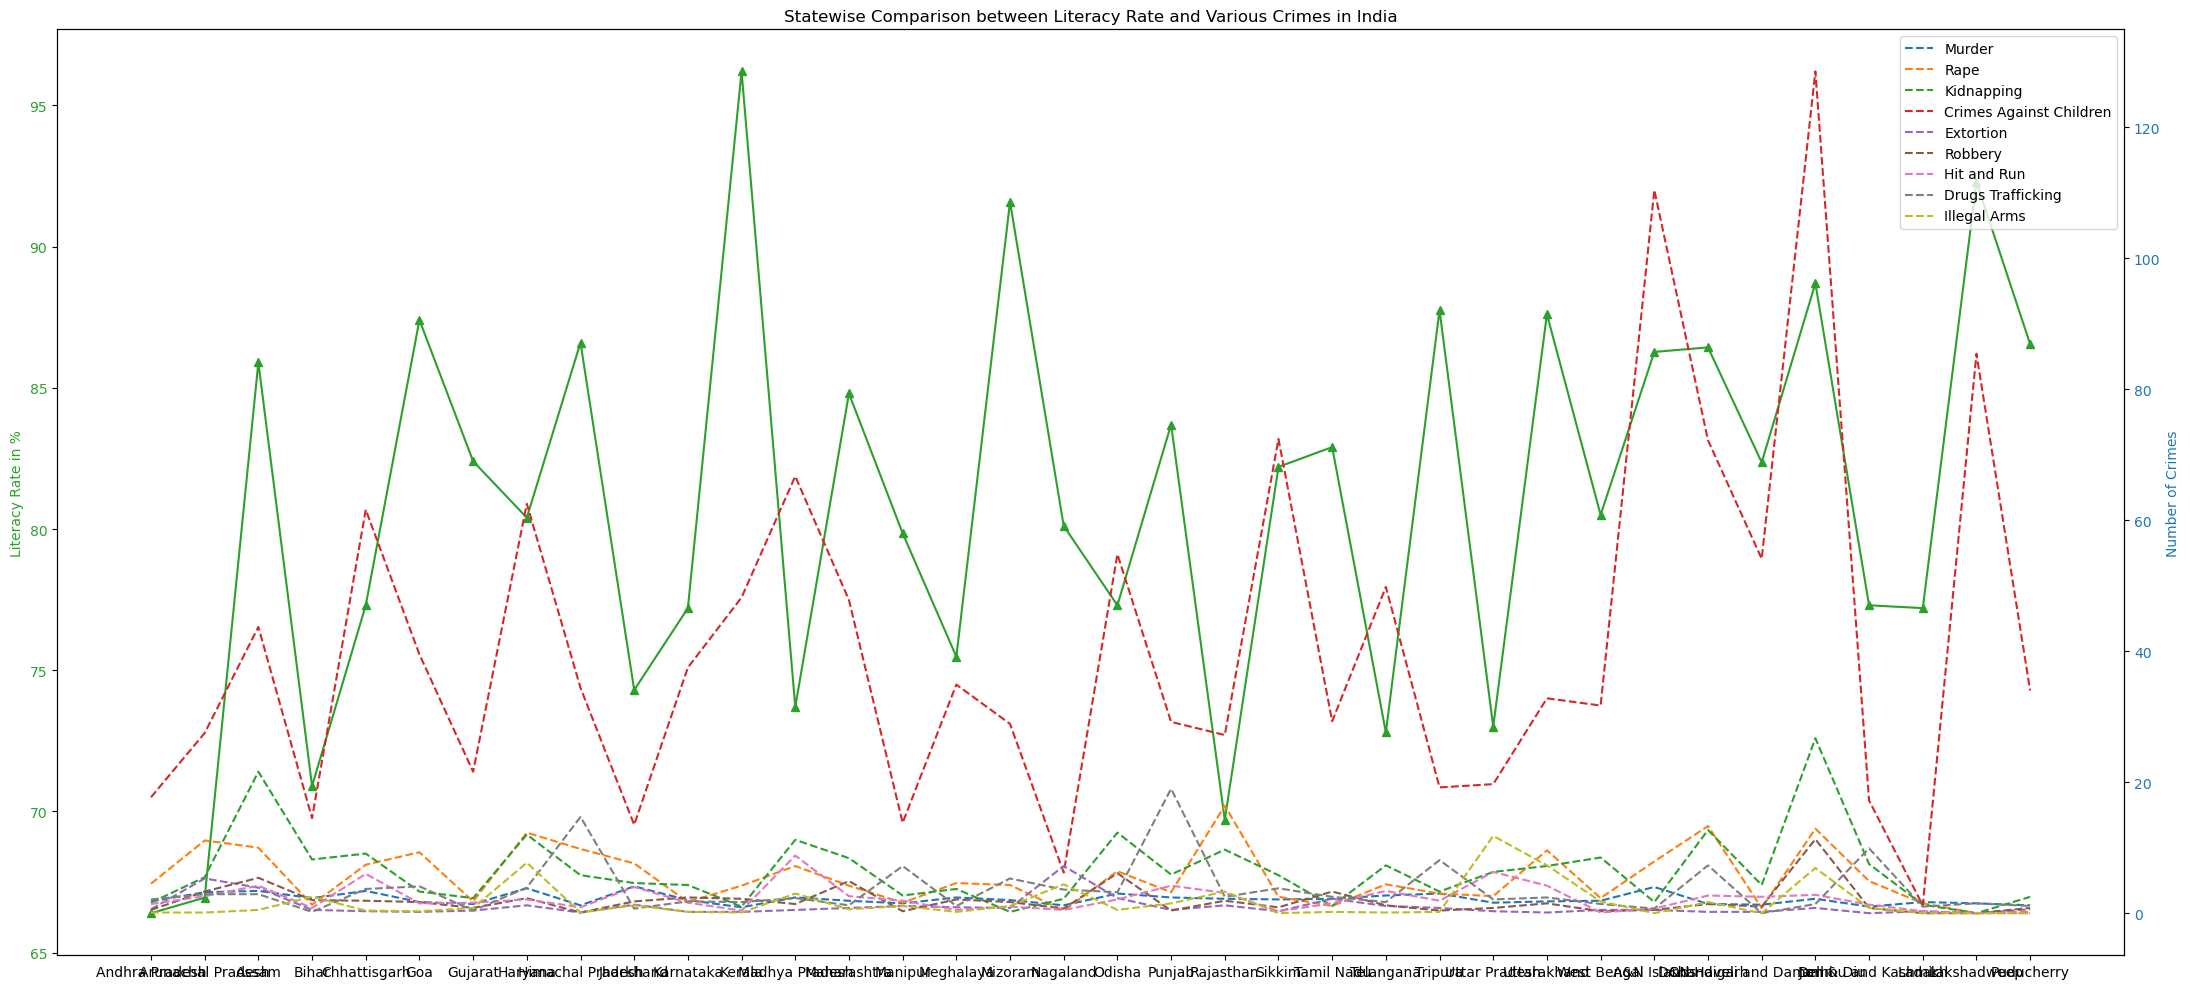

In [209]:
import matplotlib.pyplot as plt

# Select the relevant columns from the DataFrame
crime_literacy_data = cii[['State / UT', 'Literacy Rate', 'Murder', 'Rape', 'Kidnapping', 'Crimes Against Children', 'Extortion', 'Robbery', 'Hit and Run', 'Drugs Trafficking', 'Illegal Arms']]

# Set the State / UT column as the index
crime_literacy_data.set_index('State / UT', inplace=True)

# Create a figure and axes
plt.figure(figsize=(22, 10))

# Plot literacy rate
color = 'tab:green'
plt.plot(crime_literacy_data.index, crime_literacy_data['Literacy Rate'], color=color, marker='^', label='Literacy Rate')
plt.gca().tick_params(axis='y', labelcolor=color)
plt.gca().set_ylabel('Literacy Rate in %', color=color)

# Create a second y-axis for crime counts
ax2 = plt.gca().twinx()

# Plot crime counts for each type of crime
color = 'tab:blue'
crime_types = ['Murder', 'Rape', 'Kidnapping', 'Crimes Against Children', 'Extortion', 'Robbery', 'Hit and Run', 'Drugs Trafficking', 'Illegal Arms']
plt.xticks(rotation=90)
for crime_type in crime_types:
    plt.plot(crime_literacy_data.index, crime_literacy_data[crime_type], linestyle='--', label=crime_type)
    plt.xticks(rotation=90)

plt.gca().set_ylabel('Number of Crimes', color=color)
plt.gca().tick_params(axis='y', labelcolor=color)
plt.gca().set_title('Statewise Comparison between Literacy Rate and Various Crimes in India')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
2.3: Analysis of year on year total crime

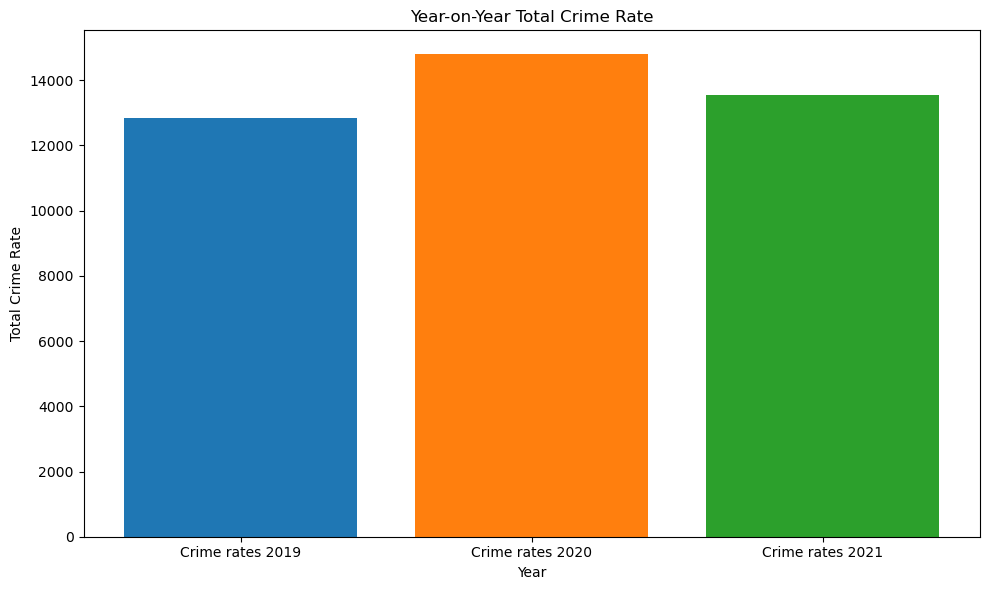

In [231]:
import matplotlib.pyplot as plt

# Sum up the total crime rates for each year
total_crime_rates = cii[['Crime rates 2019', 'Crime rates 2020', 'Crime rates 2021']].sum()
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.bar(crime_rates_total.index, crime_rates_total.values, color=colors)
plt.title('Year-on-Year Total Crime Rate')
plt.xlabel('Year')
plt.ylabel('Total Crime Rate')

plt.tight_layout()
plt.show()


In [ ]:
2.4: Analysis of area vs overall crime

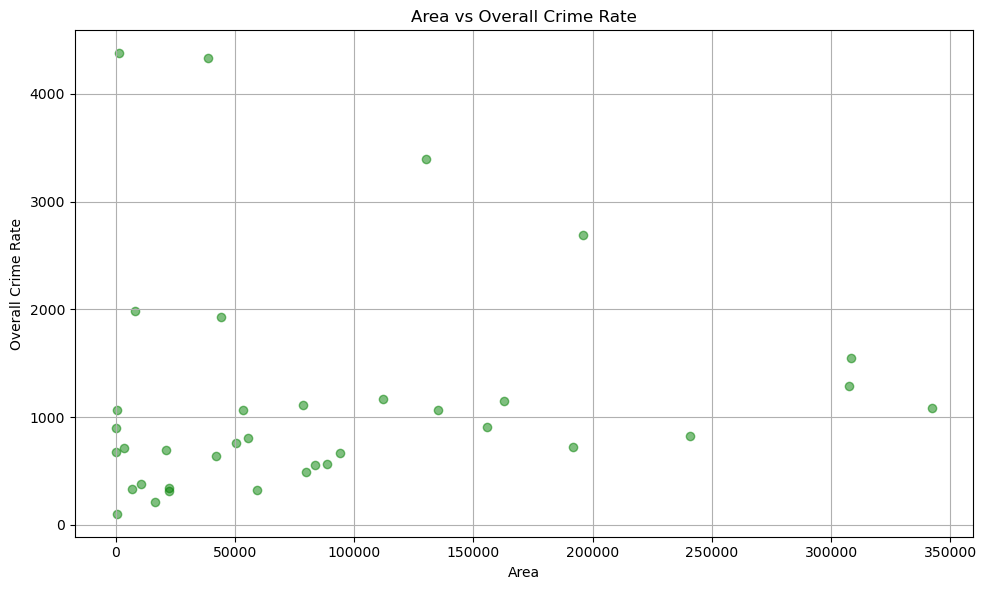

In [233]:
import matplotlib.pyplot as plt

# Calculate the overall crime rate by summing up crime rates for all three years
cii['Overall Crime Rate'] = cii[['Crime rates 2019', 'Crime rates 2020', 'Crime rates 2021']].sum(axis=1)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(cii['Area'], cii['Overall Crime Rate'], color='green', alpha=0.5)
plt.title('Area vs Overall Crime Rate')
plt.xlabel('Area')
plt.ylabel('Overall Crime Rate')
plt.grid(True)

plt.tight_layout()
plt.show()


2.5:Analysis of population vs overall crime

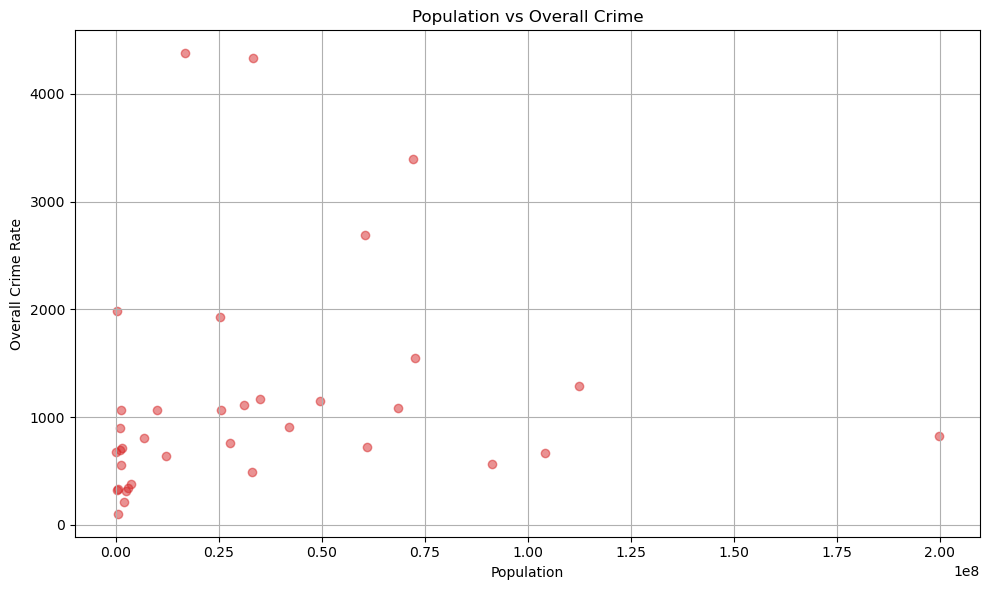

In [235]:
import matplotlib.pyplot as plt

# Extracting population and total crime rates
population = cii['Population']
overall_crime = cii[['Crime rates 2019', 'Crime rates 2020', 'Crime rates 2021']].sum(axis=1)

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(population, overall_crime, color='tab:red', alpha=0.5)
plt.title('Population vs Overall Crime')
plt.xlabel('Population')
plt.ylabel('Overall Crime Rate')
plt.grid(True)

plt.tight_layout()
plt.show()


Crime Report for Each State/Union Territory

1. Andhra Pradesh
- Population: 49,577,103
- Literacy Rate: 66.4%
- Total Crime per capita: 0.0044819
- Crime rates (2019-2021): 278.6, 452.7, 420.4
- Notable Crimes: The crime rates have shown fluctuations over the years, with a slight decrease from 2019 to 2021. However, the state still faces challenges related to violent crimes, including murder, rape, and kidnapping.

2. Arunachal Pradesh
- Population: 1,383,727
- Literacy Rate: 66.95%
- Total Crime per capita: 0.0021962
- Crime rates (2019-2021): 190.9, 164.5, 197.7
- Notable Crimes: Despite the low population, Arunachal Pradesh has experienced a fluctuating crime rate. The state should focus on addressing crimes like rape and kidnapping to ensure the safety of its residents.

3. Assam
- Population: 31,205,576
- Literacy Rate: 85.9%
- Total Crime per capita: 0.0042697
- Crime rates (2019-2021): 385.5, 349.5, 379
- Notable Crimes: Assam has witnessed a considerable decrease in crime rates from 2019 to 2020, but a slight increase in 2021. The state needs to address issues related to crimes against children and kidnapping to maintain public safety.

4. Bihar
- Population: 104,099,452
- Literacy Rate: 70.9%
- Total Crime per capita: 0.0027097
- Crime rates (2019-2021): 224, 211.3, 228
- Notable Crimes: Bihar has shown a relatively stable crime rate over the years. However, there is still room for improvement, especially in reducing crimes like murder and drugs trafficking.

5. Chhattisgarh
- Population: 25,545,198
- Literacy Rate: 77.3%
- Total Crime per capita: 0.0043309
- Crime rates (2019-2021): 334.7, 352.9, 373.7
- Notable Crimes: Chhattisgarh has witnessed an increasing trend in crime rates over the years. The state needs to focus on addressing violent crimes and crimes against children to ensure the well-being of its citizens.

6. Goa
- Population: 1,458,545
- Literacy Rate: 87.4%
- Total Crime per capita: 0.0020507
- Crime rates (2019-2021): 241.5, 281.1, 191.6
- Notable Crimes: Despite being a tourist destination with a relatively low population, Goa still faces challenges related to crime. The state should focus on reducing crimes like rape and extortion to maintain its reputation as a safe place for residents and tourists alike.

7. Gujarat
- Population: 60,439,692
- Literacy Rate: 82.4%
- Total Crime per capita: 0.0121069
- Crime rates (2019-2021): 631.6, 1011.4, 1044.2
- Notable Crimes: Gujarat has experienced a significant increase in crime rates over the years, indicating a need for enhanced law enforcement measures. The state should prioritize addressing crimes like robbery and illegal arms trafficking to ensure public safety.

8. Haryana
- Population: 25,351,462
- Literacy Rate: 80.4%
- Total Crime per capita: 0.0081428
- Crime rates (2019-2021): 577.4, 658.6, 697.3
- Notable Crimes: Haryana has shown a consistent increase in crime rates over the years, particularly in violent crimes like murder and kidnapping. The state should implement proactive measures to curb these offenses and ensure the safety of its residents.

9. Himachal Pradesh
- Population: 6,864,602
- Literacy Rate: 86.6%
- Total Crime per capita: 0.0027435
- Crime rates (2019-2021): 272.4, 280.2, 254.3
- Notable Crimes: Himachal Pradesh has witnessed a slight decrease in crime rates over the years, indicating effective law enforcement measures. However, the state should remain vigilant in addressing crimes like rape and drugs trafficking to maintain its reputation as a safe tourist destination.

10. Jharkhand
- Population: 32,988,134
- Literacy Rate: 74.3%
- Total Crime per capita: 0.001842
- Crime rates (2019-2021): 165.5, 166.8, 157.3
- Notable Crimes: Jharkhand has shown a relatively stable crime rate over the years. However, the state should focus on addressing crimes like kidnapping and robbery to ensure the safety and security of its residents.

11. Karnataka
- Population: 61,095,297
- Literacy Rate: 77.2%
- Total Crime per capita: 0.0026794
- Crime rates (2019-2021): 248.1, 225.7, 244.4
- Notable Crimes: Karnataka has experienced fluctuations in crime rates over the years, indicating the need for consistent law enforcement efforts. The state should prioritize addressing crimes like robbery and drugs trafficking to maintain public safety.

12. Kerala
- Population: 33,406,061
- Literacy Rate: 96.2%
- Total Crime per capita: 0.0157145
- Crime rates (2019-2021): 1287.7, 1568.4, 1477.2
- Notable Crimes: Kerala faces significant challenges related to crime, particularly in crimes against children and drugs trafficking. The state should implement robust measures to address these issues and ensure the safety of its residents, especially vulnerable groups.

13. Madhya Pradesh
- Population: 72,626,809
- Literacy Rate: 73.7%
- Total Crime per capita: 0.0065529
- Crime rates (2019-2021): 478.9, 511.1, 560.8
- Notable Crimes: Madhya Pradesh has shown a concerning increase in crime rates over the years, particularly in violent crimes like murder and kidnapping. The state should focus on strengthening law enforcement and implementing preventive measures to curb these offenses.

14. Maharashtra
- Population: 112,374,333
- Literacy Rate: 84.8%
- Total Crime per capita: 0.0048125
- Crime rates (2019-2021): 415.8, 435.8, 433.5
- Notable Crimes: Maharashtra has experienced relatively stable crime rates over the years. However, the state should continue its efforts to address crimes like robbery and extortion to maintain public safety and security.

15. Manipur
- Population: 2,570,390
- Literacy Rate: 79.85%
- Total Crime per capita: 0.0012465
- Crime rates (2019-2021): 117.7, 95, 101
- Notable Crimes: Manipur has shown fluctuations in crime rates over the years, indicating the need for consistent law enforcement efforts. The state should prioritize addressing crimes like rape and drugs trafficking to ensure public safety.

16. Meghalaya
- Population: 2,966,889
- Literacy Rate: 75.48%
- Total Crime per capita: 0.0011554
- Crime rates (2019-2021): 120.6, 114.7, 104
- Notable Crimes: Meghalaya has shown a decrease in crime rates over the years, which is a positive trend. However, the state should remain vigilant and continue its efforts to address crimes like kidnapping and crimes against children to ensure sustained improvement in public safety.

17. Mizoram
- Population: 1,097,206
- Literacy Rate: 91.58%
- Total Crime per capita: 0.0029129
- Crime rates (2019-2021): 241, 189.6, 262.2
- Notable Crimes: Mizoram has experienced fluctuations in crime rates, indicating the need for consistent law enforcement efforts. The state should focus on addressing crimes like robbery and extortion to maintain public safety and security.

18. Nagaland
- Population: 1,978,502
- Literacy Rate: 80.11%
- Total Crime per capita: 0.000747
- Crime rates (2019-2021): 77.1, 69.4, 67.2
- Notable Crimes: Nagaland has relatively low crime rates compared to other states. However, the state should remain vigilant and continue its efforts to prevent crimes like murder and illegal arms trafficking to ensure the safety of its residents.

19. Odisha
- Population: 41,974,219
- Literacy Rate: 77.3%
- Total Crime per capita: 0.0037027
- Crime rates (2019-2021): 277.9, 295.2, 339.4
- Notable Crimes: Odisha has shown an increase in crime rates over the years, particularly in crimes against children and drugs trafficking. The state should implement robust measures to address these issues and ensure the safety of its residents.

20. Punjab
- Population: 27,743,338
- Literacy Rate: 83.7%
- Total Crime per capita: 0.0026522
- Crime rates (2019-2021): 243.3, 274.6, 242
- Notable Crimes: Punjab has experienced fluctuations in crime rates over the years, indicating the need for consistent law enforcement efforts. The state should prioritize addressing crimes like kidnapping and robbery to maintain public safety.

21. Rajasthan
- Population: 68,548,437
- Literacy Rate: 69.7%
- Total Crime per capita: 0.0041514
- Crime rates (2019-2021): 392.3, 331.2, 357.6
- Notable Crimes: Rajasthan has shown a fluctuating trend in crime rates, indicating the need for sustained efforts in law enforcement. The state should focus on addressing crimes like rape and kidnapping to ensure the safety and security of its residents.

22. Sikkim
- Population: 610,577
- Literacy Rate: 82.2%
- Total Crime per capita: 0.0011923
- Crime rates (2019-2021): 123.5, 100.4, 107.4
- Notable Crimes: Sikkim has relatively low crime rates compared to other states. However, the state should remain vigilant and continue its efforts to prevent crimes like rape and drugs trafficking to maintain public safety.

23. Tamil Nadu
- Population: 72,147,030
- Literacy Rate: 82.9%
- Total Crime per capita: 0.010489
- Crime rates (2019-2021): 600.3, 1808.8, 989.5
- Notable Crimes: Tamil Nadu has experienced significant fluctuations in crime rates over the years, particularly in crimes like extortion and hit and run. The state should implement robust measures to address these issues and ensure the safety of its residents.

24. Telangana
- Population: 35,003,674
- Literacy Rate: 72.8%
- Total Crime per capita: 0.0045369
- Crime rates (2019-2021): 352, 393, 420.5
- Notable Crimes: Telangana has shown an increase in crime rates over the years, particularly in crimes like murder and drugs trafficking. The state should strengthen its law enforcement efforts to address these issues and ensure public safety.

25. Tripura
- Population: 3,673,917
- Literacy Rate: 87.75%
- Total Crime per capita: 0.0013032
- Crime rates (2019-2021): 149.6, 115.1, 117.3
- Notable Crimes: Tripura has relatively low crime rates compared to other states. However, the state should remain vigilant and continue its efforts to prevent crimes like kidnapping and extortion to maintain public safety.

26. Uttar Pradesh
- Population: 199,812,341
- Literacy Rate: 73%
- Total Crime per capita: 0.0030433
- Crime rates (2019-2021): 278.2, 287.4, 262.4
- Notable Crimes: Uttar Pradesh faces challenges in controlling crimes like murder and kidnapping. The state should focus on implementing effective law enforcement measures and strengthening community policing to address these issues and ensure public safety.

27. Uttarakhand
- Population: 10,086,292
- Literacy Rate: 87.6%
- Total Crime per capita: 0.0034577
- Crime rates (2019-2021): 252.8, 506.8, 304.9
- Notable Crimes: Uttarakhand has shown significant fluctuations in crime rates, particularly in crimes like robbery and illegal arms possession. The state should implement targeted interventions to address these issues and ensure public safety.

28. West Bengal
- Population: 91,276,115
- Literacy Rate: 80.5%
- Total Crime per capita: 0.001992
- Crime rates (2019-2021): 193.7, 186.6, 185
- Notable Crimes: West Bengal has relatively low crime rates compared to other states. However, the state should remain vigilant and continue its efforts to prevent crimes like kidnapping and robbery to maintain public safety.

Union Territories:

29. A&N Islands
- Population: 380,581
- Literacy Rate: 86.27%
- Total Crime per capita: 0.0034999
- Crime rates (2019-2021): 1013.6, 637.1, 332.2
- Notable Crimes: A&N Islands has experienced fluctuations in crime rates, particularly in crimes like crimes against children and extortion. The authorities should implement targeted interventions to address these issues and ensure the safety of residents and tourists.

30. Chandigarh
- Population: 1,055,450
- Literacy Rate: 86.43%
- Total Crime per capita: 0.0028377
- Crime rates (2019-2021): 381.6, 271.6, 247.1
- Notable Crimes: Chandigarh has shown a decrease in crime rates over the years, indicating effective law enforcement measures. However, the authorities should continue their efforts to prevent crimes like murder and hit and run to maintain public safety.

31. D&N Haveli and Daman & Diu
- Population: 585,764
- Literacy Rate: 82.36%
- Total Crime per capita: 0.0009885
- Crime rates (2019-2021): 0, 51.3, 52.3
- Notable Crimes: D&N Haveli and Daman & Diu have relatively low crime rates. However, the authorities should remain vigilant and continue their efforts to prevent crimes like drugs trafficking and kidnapping to ensure public safety.

32. Delhi
- Population: 16,787,941
- Literacy Rate: 88.7%
- Total Crime per capita: 0.0182505
- Crime rates (2019-2021): 1586.1, 1309.5, 1479.9
- Notable Crimes: Delhi faces significant challenges in controlling crimes like murder and kidnapping. The authorities should prioritize implementing comprehensive strategies to address these issues, including improving law enforcement measures and enhancing community engagement to ensure public safety.

33. Jammu and Kashmir
- Population: 12,267,032
- Literacy Rate: 77.3%
- Total Crime per capita: 0.0025821
- Crime rates (2019-2021): 187.8, 216.7, 235.7
- Notable Crimes: Jammu and Kashmir has faced challenges related to crimes like murder and drugs trafficking. The state should focus on implementing targeted interventions to address these issues and ensure the safety and security of residents and tourists.

34. Ladakh
- Population: 274,000
- Literacy Rate: 77.2%
- Total Crime per capita: 0.0020401
- Crime rates (2019-2021): 0, 136.1, 187.6
- Notable Crimes: Ladakh has shown a significant increase in crime rates, particularly in crimes like murder and robbery. The authorities should implement effective law enforcement measures and community-based initiatives to address these issues and ensure public safety.

35. Lakshadweep
- Population: 64,473
- Literacy Rate: 92.28%
- Total Crime per capita: 0.0019853
- Crime rates (2019-2021): 267.6, 216.2, 188.2
- Notable Crimes: Lakshadweep has experienced fluctuations in crime rates, particularly in crimes like robbery and illegal arms possession. The authorities should implement targeted interventions to address these issues and ensure the safety of residents and tourists.

36. Puducherry
- Population: 1,247,953
- Literacy Rate: 86.55%
- Total Crime per capita: 0.003682
- Crime rates (2019-2021): 264.3, 512.6, 290.1
- Notable Crimes: Puducherry has faced challenges related to crimes like extortion and robbery. The authorities should focus on implementing comprehensive strategies to address these issues and ensure public safety.

This analysis provides an overview of the crime reports for each state and union territory based on available data. It highlights the variations in crime rates and the need for targeted interventions to address specific challenges and ensure the safety and security of residents and visitors.